In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv(r'movies1.csv', sep = '::', engine='python',header=None)
movie.columns =['MovieID','MovieName','Category']
movie.head(5)


,MovieID,MovieName,Category
0,"""1",Toy Story (1995),"Animation|Children's|Comedy"""
1,"""2",Jumanji (1995),"Adventure|Children's|Fantasy"""
2,"""3",Grumpier Old Men (1995),"Comedy|Romance"""
3,"""4",Waiting to Exhale (1995),"Comedy|Drama"""
4,"""5",Father of the Bride Part II (1995),"Comedy"""


In [3]:
movie = movie.replace('"','',regex=True)
movie.dropna(inplace=True)
movie.head(5)

,MovieID,MovieName,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print(str(len(movie.index)))

3833


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieID    3833 non-null   object
 1   MovieName  3833 non-null   object
 2   Category   3833 non-null   object
dtypes: object(3)
memory usage: 119.8+ KB


In [6]:
movie['MovieID']= movie['MovieID'].astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieID    3833 non-null   int32 
 1   MovieName  3833 non-null   object
 2   Category   3833 non-null   object
dtypes: int32(1), object(2)
memory usage: 104.8+ KB


In [7]:
movie.isnull().sum()

MovieID      0
MovieName    0
Category     0
dtype: int64

In [8]:
rating= pd.read_csv(r'ratings1.csv',sep = '::', engine= 'python')
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.head(5)



,ID,MovieID,Ratings,TimeStamp
0,"""1",661,3,"978302109"""
1,"""1",914,3,"978301968"""
2,"""1",3408,4,"978300275"""
3,"""1",2355,5,"978824291"""
4,"""1",1197,3,"978302268"""


In [9]:
rating = rating.replace('"','',regex=True)

In [10]:
rating.head(5)

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [11]:
rating.dropna(inplace=True )
print(str(len(rating.index)))

1000208


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   ID         1000208 non-null  object
 1   MovieID    1000208 non-null  int64 
 2   Ratings    1000208 non-null  int64 
 3   TimeStamp  1000208 non-null  object
dtypes: int64(2), object(2)
memory usage: 30.5+ MB


In [13]:
rating[['ID','MovieID','Ratings','TimeStamp']]= rating[['ID','MovieID','Ratings','TimeStamp']].astype(int)
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000208 non-null  int32
 1   MovieID    1000208 non-null  int32
 2   Ratings    1000208 non-null  int32
 3   TimeStamp  1000208 non-null  int32
dtypes: int32(4)
memory usage: 15.3 MB


In [14]:
rating.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [15]:
user= pd.read_csv(r'users1.csv', sep='::', engine= 'python')
user.columns=['UserID','Gender','Age','Occupation','Zip-code']
user.head(5)


,UserID,Gender,Age,Occupation,Zip-code
0,"""2",M,56,16,"70072"""
1,"""3",M,25,15,"55117"""
2,"""4",M,45,7,"02460"""
3,"""5",M,25,20,"55455"""
4,"""6",F,50,9,"55117"""


In [16]:
user =user.replace('"','',regex=True)
user.head(5)

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6039 non-null   object
 1   Gender      6039 non-null   object
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(2), object(3)
memory usage: 236.0+ KB


In [18]:
user.dropna(inplace=True )

In [19]:
print(str(len(user.index)))

6039


In [20]:
data = pd.concat([movie,rating,user],axis = 1)
data.head()

,MovieID,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,661,3,978302109,2,M,56.0,16.0,70072
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,914,3,978301968,3,M,25.0,15.0,55117
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,3408,4,978300275,4,M,45.0,7.0,02460
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,2355,5,978824291,5,M,25.0,20.0,55455
4,5.0,Father of the Bride Part II (1995),Comedy,1,1197,3,978302268,6,F,50.0,9.0,55117


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000208 entries, 0 to 1000207
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     3833 non-null     float64
 1   MovieName   3833 non-null     object 
 2   Category    3833 non-null     object 
 3   ID          1000208 non-null  int32  
 4   MovieID     1000208 non-null  int32  
 5   Ratings     1000208 non-null  int32  
 6   TimeStamp   1000208 non-null  int32  
 7   UserID      6039 non-null     object 
 8   Gender      6039 non-null     object 
 9   Age         6039 non-null     float64
 10  Occupation  6039 non-null     float64
 11  Zip-code    6039 non-null     object 
dtypes: float64(3), int32(4), object(5)
memory usage: 83.9+ MB


In [22]:
data['Age'].unique()

array([56., 25., 45., 50., 35., 18.,  1., nan])

In [23]:
data.isna().sum()

MovieID       996375
MovieName     996375
Category      996375
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [24]:
data.dropna(axis=0,inplace=True)
data.isna().sum()

MovieID       0
MovieName     0
Category      0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

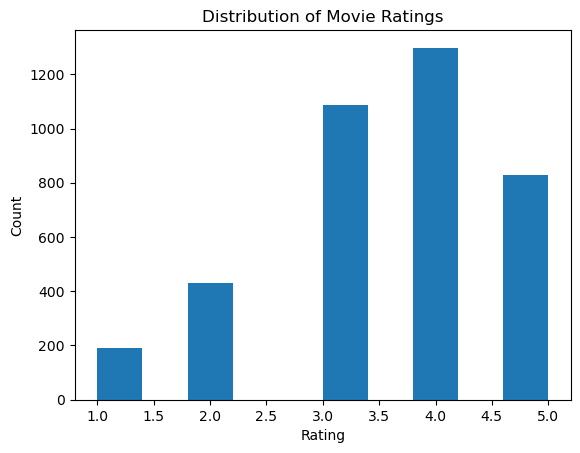

In [25]:
plt.hist(data['Ratings'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

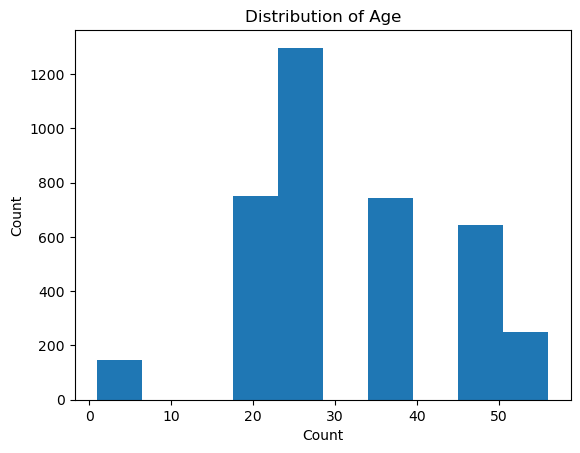

In [26]:
plt.hist(data['Age'], bins=10)
plt.xlabel('Count')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

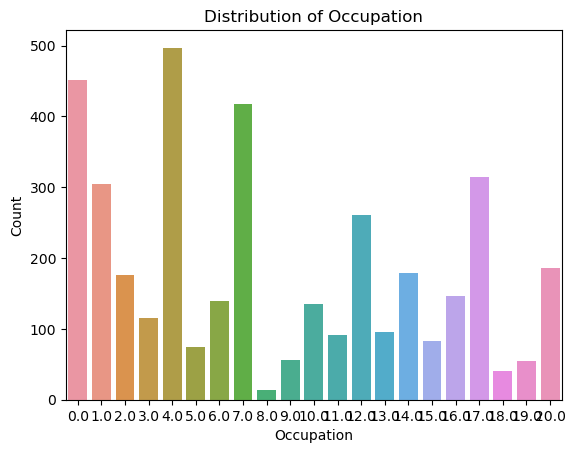

In [27]:
sns.countplot(x='Occupation',data=data)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')
plt.show()

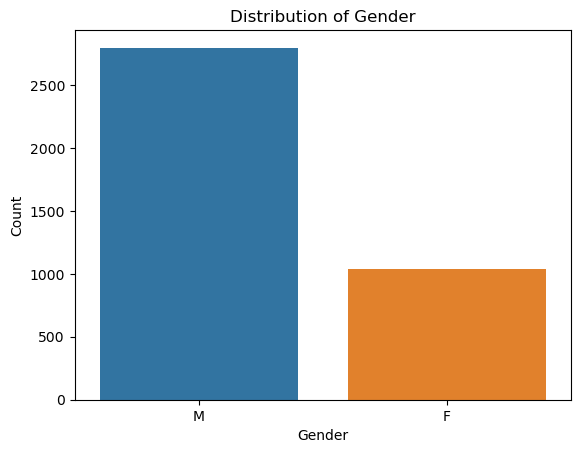

In [28]:
sns.countplot(x='Gender',data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [29]:
categories_split = data['Category'].str.split('|')


In [30]:
unique_categories = set()

In [31]:
for category_list in categories_split:
    unique_categories.update(category_list)


In [32]:
unique_categories_list = sorted(list(unique_categories))


In [33]:
print(unique_categories_list)

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [34]:
category = data['Category'].str.get_dummies(sep='|')
category.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df = pd.concat([category, data[['Ratings', 'Gender', 'Age', 'Occupation']]], axis=1)


In [36]:
df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Ratings,Gender,Age,Occupation
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,3,M,56.0,16.0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,3,M,25.0,15.0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,4,M,45.0,7.0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,5,M,25.0,20.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,F,50.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,M,25.0,7.0
3879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,3,M,18.0,2.0
3880,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,5,M,56.0,14.0
3881,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4,M,50.0,16.0


In [37]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
82         0          0          0           0       0      0            0   
83         0          0          0           0       1      0            0   
122        0          0          0           0       0      0            0   
133        0          0          0           0       1      0            0   
157        0          0          0           0       0      0            0   
...      ...        ...        ...         ...     ...    ...          ...   
3872       0          0          0           0       0      0            0   
3873       0          0          0           0       1      0            0   
3874       0          0          0           0       1      0            0   
3878       0          0          0           0       1      0            0   
3879       0          0          0           0       0      0            0   

      Drama  Fantasy  Film-Noir  ...  Mystery  Romance  Sci-Fi 

In [38]:
df = df.loc[:,~df.columns.duplicated()]
df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Ratings,Gender,Age,Occupation
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,3,M,56.0,16.0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,3,M,25.0,15.0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,4,M,45.0,7.0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,5,M,25.0,20.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,F,50.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2,M,25.0,7.0
3879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,3,M,18.0,2.0
3880,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,5,M,56.0,14.0
3881,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4,M,50.0,16.0


In [39]:
df_long = df.melt(id_vars=['Ratings', 'Gender', 'Age', 'Occupation'], 
                  var_name='Category', 
                  value_name='Present')

In [40]:
df_long = df_long[df_long['Present'] == 1]

In [41]:
df_long

,Ratings,Gender,Age,Occupation,Category,Present
5,5,M,35.0,1.0,Action,1
8,4,F,35.0,1.0,Action,1
9,5,F,25.0,1.0,Action,1
14,4,F,35.0,0.0,Action,1
19,3,M,18.0,16.0,Action,1
...,...,...,...,...,...,...
68784,4,M,45.0,14.0,Western,1
68838,5,M,18.0,4.0,Western,1
68851,3,M,56.0,11.0,Western,1
68912,5,F,35.0,9.0,Western,1


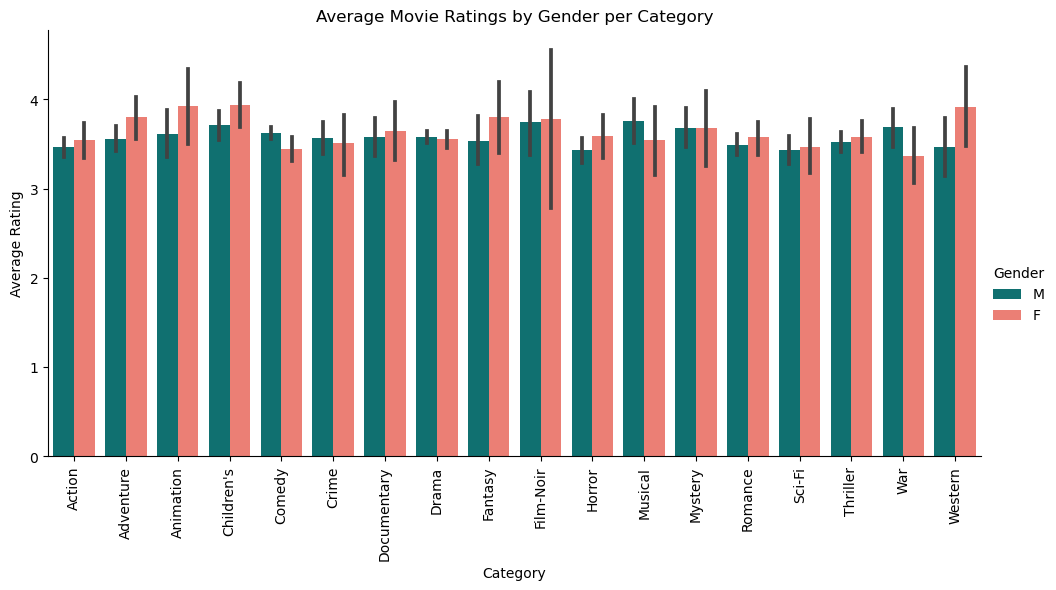

In [42]:
custom_palette = ["#008080","#FF6F61"] 
sns.catplot(x="Category", y="Ratings", hue="Gender", kind="bar", data=df_long, palette=custom_palette ,aspect=2)
plt.title('Average Movie Ratings by Gender per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

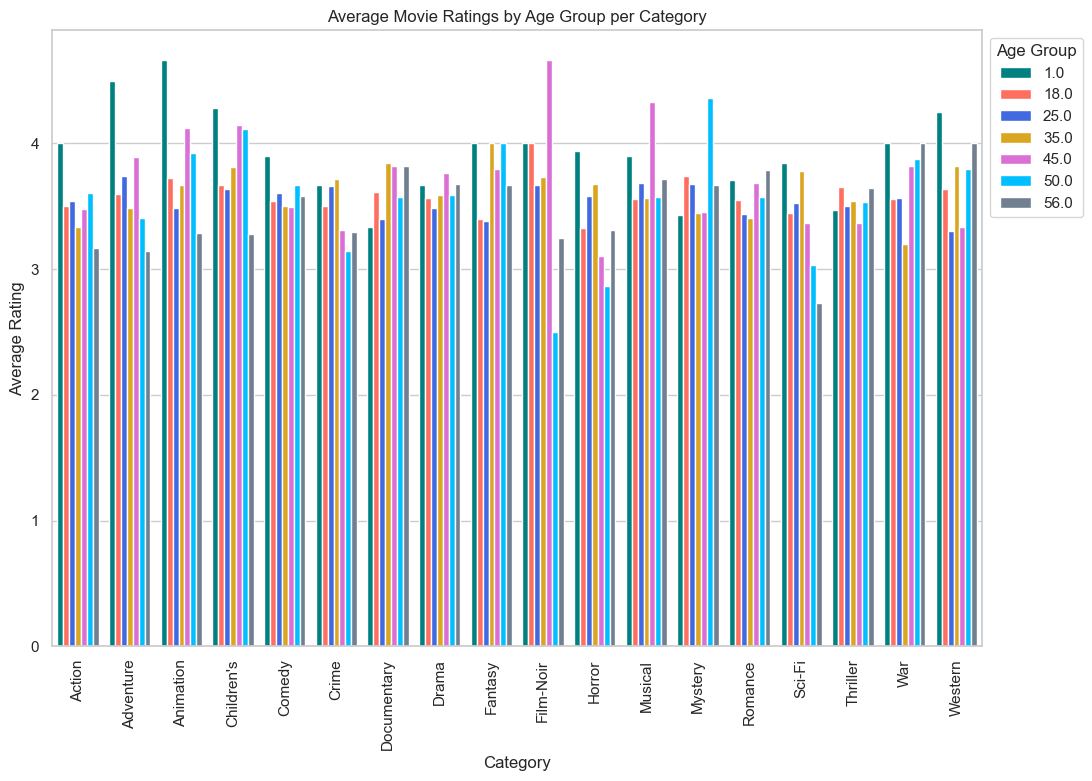

In [43]:
sns.set(style="whitegrid")

# Create the bar plot with modified bar width and colors
plt.figure(figsize=(12, 8))
sns.barplot(x="Category", y="Ratings", hue="Age", data=df_long, ci=None, palette=["#008080", "#FF6F61", "#4169E1", "#DAA520", "#DA70D6", "#00BFFF", "#708090"],saturation=1.5)
plt.title('Average Movie Ratings by Age Group per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.legend(title='Age Group', loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


In [44]:
pivot_table = df_long.pivot_table(index='Occupation', columns='Category', values='Ratings', aggfunc='mean')
pivot_table

Category,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Occupation,,,,,,,,,,,,,,,,,,
0.0,3.365854,3.782609,3.941176,4.230769,3.632000,3.371429,3.700000,3.502591,3.800000,4.000000,3.236842,3.857143,3.875000,3.683333,3.500000,3.545455,3.533333,3.714286
1.0,3.371429,3.421053,3.250000,3.666667,3.704082,3.818182,3.571429,3.617188,4.000000,4.000000,3.833333,3.428571,3.200000,3.594595,3.409091,3.486486,3.125000,3.285714
2.0,3.760000,3.750000,3.600000,3.642857,3.717391,4.090909,3.600000,3.533333,4.000000,4.500000,3.529412,3.500000,3.666667,3.520000,3.250000,3.500000,3.857143,5.000000
3.0,3.421053,3.800000,3.000000,3.500000,3.400000,3.250000,2.000000,3.547170,4.000000,1.000000,3.300000,3.000000,2.500000,3.071429,3.300000,3.333333,3.285714,4.000000
4.0,3.569444,3.451613,3.538462,3.666667,3.529032,3.450000,3.769231,3.495652,3.285714,3.000000,3.323529,3.230769,3.631579,3.585714,3.593750,3.457143,3.545455,3.888889
5.0,3.285714,3.666667,NaN,4.500000,3.684211,2.333333,3.500000,3.407407,4.000000,NaN,3.666667,4.000000,NaN,3.142857,3.571429,3.416667,3.000000,NaN
6.0,3.250000,3.250000,5.000000,4.090909,3.590909,3.777778,2.600000,3.933333,3.000000,3.500000,3.300000,4.500000,4.166667,4.000000,2.727273,3.562500,3.400000,NaN
7.0,3.697674,3.892857,4.083333,4.120000,3.476562,3.470588,3.800000,3.588571,3.800000,5.000000,3.224490,4.272727,3.636364,3.510204,3.482759,3.530612,3.631579,3.500000
8.0,3.500000,4.500000,5.000000,5.000000,3.833333,3.000000,NaN,3.875000,NaN,NaN,NaN,5.000000,NaN,2.000000,3.000000,3.000000,5.000000,NaN


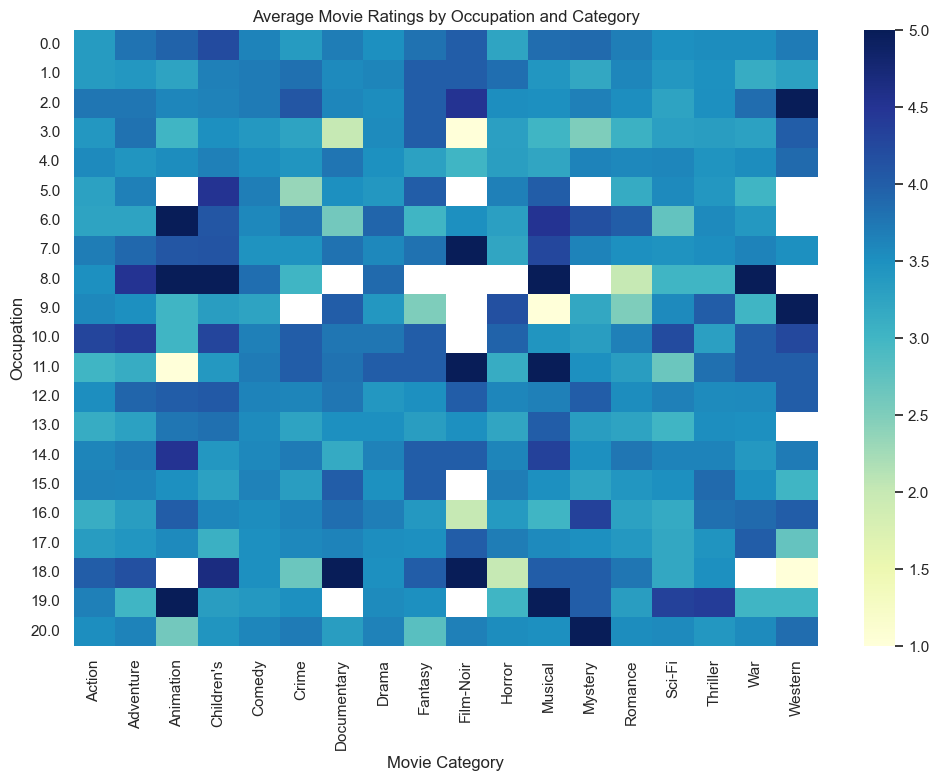

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Average Movie Ratings by Occupation and Category')
plt.xlabel('Movie Category')
plt.ylabel('Occupation')
plt.show()

In [46]:
X = df.drop(["Ratings","Age","Gender", "Occupation"],axis=1)
y = df["Ratings"]


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)

1.2906718889538777
1.1360774132751155
-0.003306185474873713
